<a href="https://colab.research.google.com/github/Faraazusmani/PricePredictionModel/blob/main/price_prediction_apple_stocks_over_a_decade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#About: This project uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#       Predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-12-30')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.593426
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.604825
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.499768
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.487752
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.530883
...,...,...,...,...,...,...
2020-12-23,132.429993,130.779999,132.160004,130.960007,88223700.0,130.960007
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.970001
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.690002


In [ ]:
#Get the number of rows and columns in the dataset
df.shape

(2768, 6)

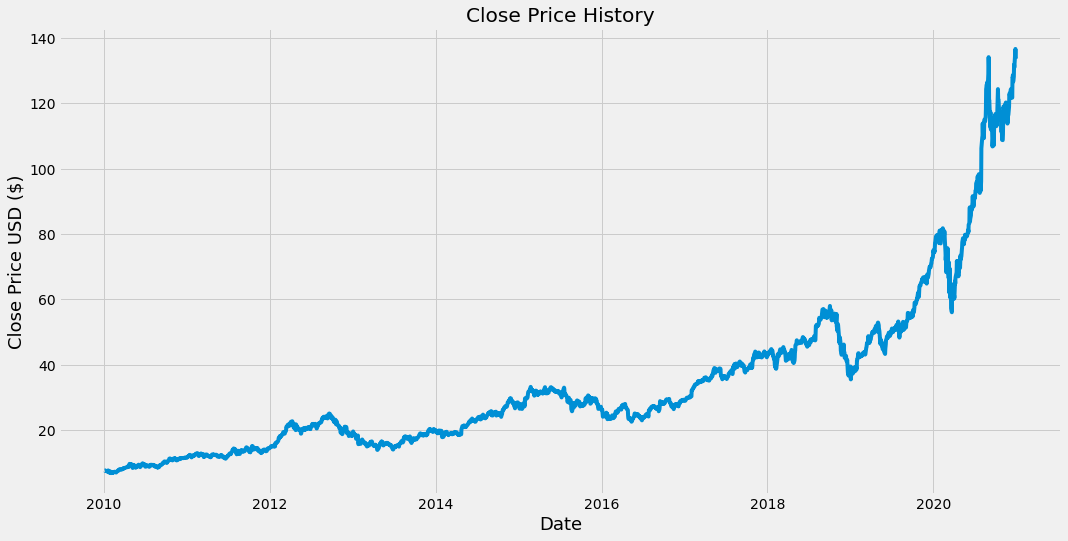

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only 'Close Column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2215

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00604082],
       [0.00614259],
       [0.00520456],
       ...,
       [1.        ],
       [0.98598173],
       [0.97712411]])

In [ ]:
#Create the traininig data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the train into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([6.04081537e-03, 6.14259463e-03, 5.20456310e-03, 5.09728206e-03,
       5.48239934e-03, 4.96799389e-03, 4.31054582e-03, 5.11653829e-03,
       4.78093703e-03, 3.81814748e-03, 6.32414971e-03, 5.41362709e-03,
       4.40682330e-03, 1.56797070e-03, 3.03141124e-03, 3.82089837e-03,
       4.35456006e-03, 1.99159678e-03, 2.75089022e-06, 7.37220216e-04,
       1.04806347e-03, 1.97509143e-03, 0.00000000e+00, 9.38031530e-04,
       5.69419585e-04, 1.13884284e-03, 8.44504935e-04, 1.82104525e-03,
       2.29143646e-03, 3.12218695e-03, 2.88836862e-03, 2.99289878e-03,
       2.64629396e-03, 2.30244003e-03, 1.37816295e-03, 2.36846139e-03,
       2.73707334e-03, 3.45778821e-03, 4.65990153e-03, 4.62138907e-03,
       4.75342812e-03, 5.13304363e-03, 7.39972575e-03, 7.43548365e-03,
       8.51931237e-03, 9.01995970e-03, 9.20151845e-03, 9.50410903e-03,
       8.74487802e-03, 8.91267865e-03, 8.82190294e-03, 8.96769645e-03,
       8.30749749e-03, 8.99520536e-03, 9.98825102e-03, 1.02660873e-02,
     

In [ ]:
#Conert the x_train and y_train to numpy arrays so that we can train our LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2155, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2155/2155 [==============================] - 53s 23ms/step - loss: 4.5217e-04


In [ ]:
#Create the testing dataset
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE) to evaluate the model
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

2.063732899119151

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


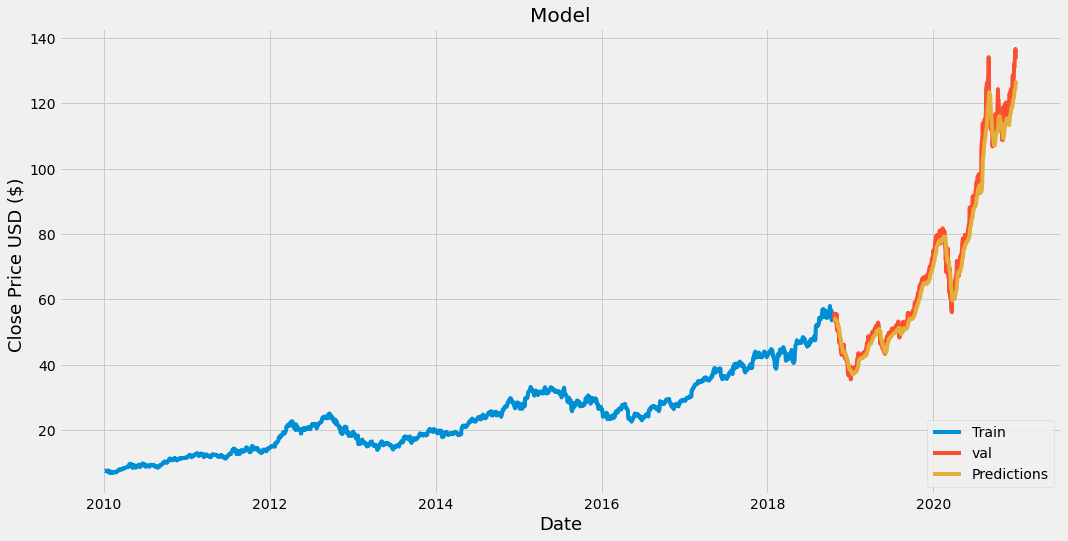

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($) ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the Valid and predicted prices
valid

,Close,Predictions
Date,,
2018-10-19,54.827499,54.109707
2018-10-22,55.162498,54.012150
2018-10-23,55.682499,53.990891
2018-10-24,53.772499,54.068462
2018-10-25,54.950001,53.974354
...,...,...
2020-12-23,130.960007,123.117447
2020-12-24,131.970001,123.930298
2020-12-28,136.690002,124.732819


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-12-30')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[127.73151]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-31', end='2020-12-31')
print(apple_quote2['Close'])

Date
2020-12-31    132.690002
Name: Close, dtype: float64
